In [1]:
import numpy as np
from Camera3D import Camera

In [2]:
cam_dict = {}
cam_dict['pos_init'] = np.array([0,0,10])
cam_dict['ang_init'] = np.array([np.pi/4, np.pi/4])

cam_dict['spec'] = {}
cam_dict['spec']['ang_limit'] = np.array([0, np.pi/2])
cam_dict['spec']['FOV'] = np.deg2rad(90)
cam_dict['spec']['range'] = 10
cam_dict['spec']['cam_time'] = np.array([10, 1])

In [3]:
test_camera = Camera(cam_dict)

In [4]:
camera_state = test_camera.get_state()
print(camera_state)

[ 0.          0.         10.          0.78539816  0.78539816]


In [5]:
direc_vec = test_camera.get_direction_vec(cam_dict['ang_init'][0], cam_dict['ang_init'][1])
print(direc_vec)

[[ 0.5       ]
 [ 0.70710678]
 [-0.5       ]]


In [6]:
height = test_camera.get_h()
print(height)

10


In [7]:
radius = test_camera.get_radius()
print(radius)

7.071067811865475


In [8]:
base = test_camera.get_base(cam_dict['ang_init'][0], cam_dict['ang_init'][1])

In [9]:
pan_vec = test_camera.get_pan_vec()
print(pan_vec)

[0.78539816 0.95993109 1.13446401 1.30899694 1.48352986 1.65806279
 1.83259571 2.00712864 2.18166156 2.35619449]


In [17]:
pan_instance1 = test_camera.get_pan_instance(5)
pan_instance2 = test_camera.get_pan_instance(15)
print(np.rad2deg(pan_instance1))
print(np.rad2deg(pan_instance2))

45.0
45.0


In [11]:
import matplotlib.pyplot as plt 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


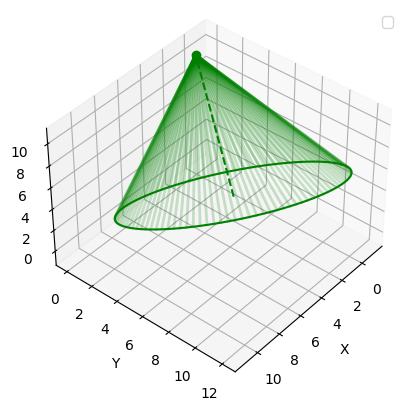

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


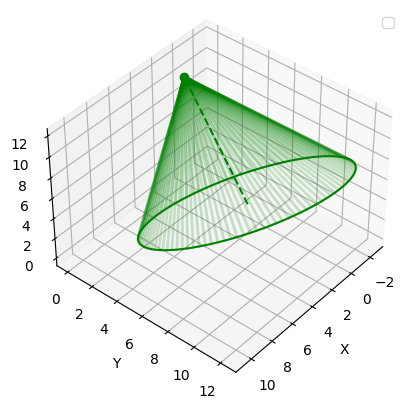

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


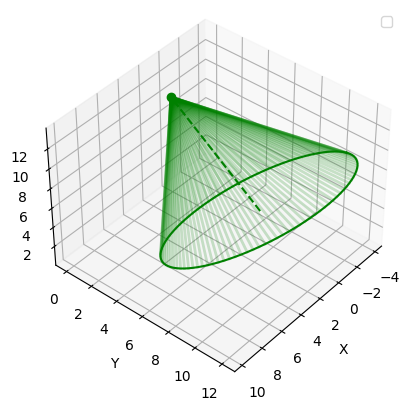

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


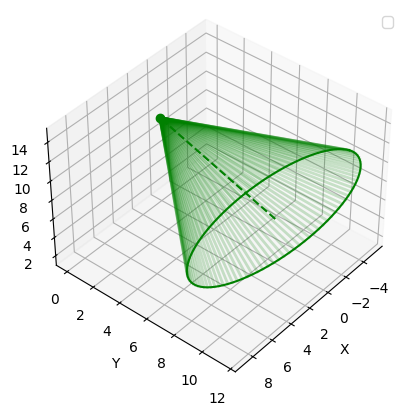

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


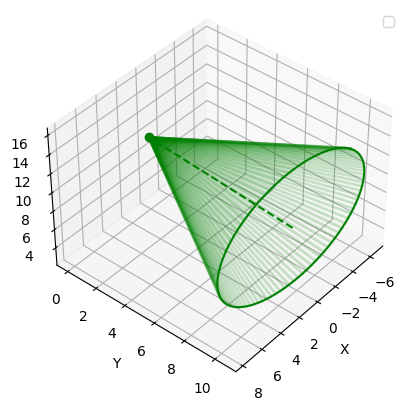

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


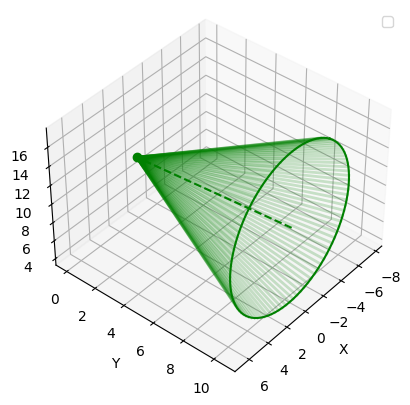

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


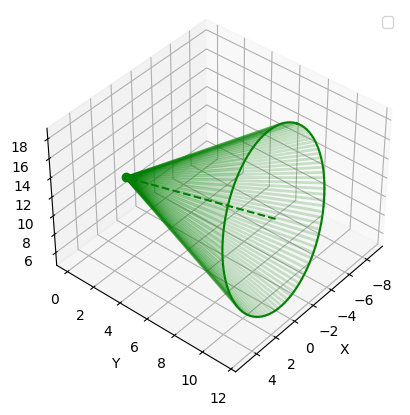

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


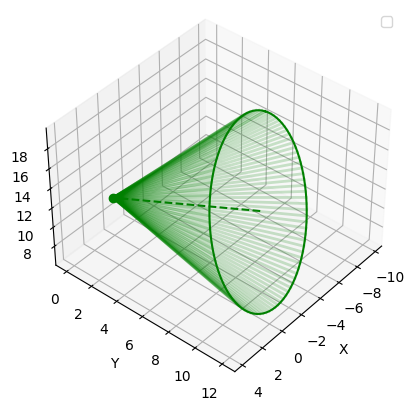

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


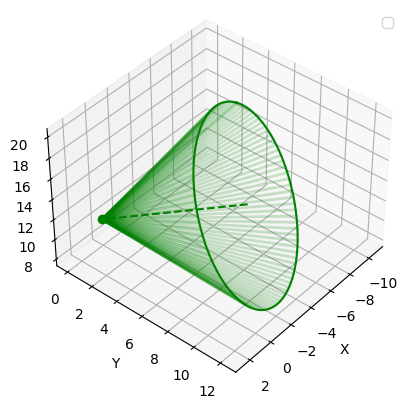

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


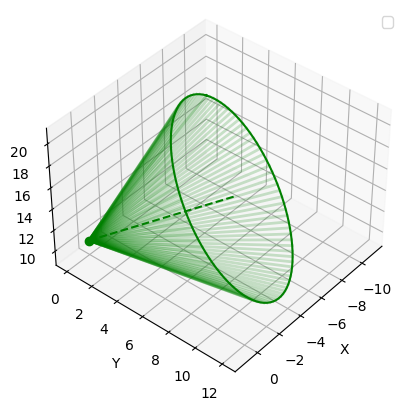

In [12]:
for i in range(len(pan_vec)):
    ax = plt.figure().add_subplot(projection='3d')
    direc_vec = test_camera.get_direction_vec(pan_vec[i], cam_dict['ang_init'][1])
    base = test_camera.get_base(pan_vec[i], cam_dict['ang_init'][1])

    # Camera position
    x = cam_dict['pos_init'][0]
    y = cam_dict['pos_init'][1]
    z = cam_dict['pos_init'][2]
    ax.plot(x, y, z, 'og')

    # Plot Direction Angle
    ax.plot([height*direc_vec[0][0]+x, x], [height*direc_vec[1][0]+y, y], [height*direc_vec[2][0]+z, z], 'g--')

    # Plot Base
    ax.plot(base[0,:], base[1,:], base[2,:], '-g')

    # Plot slant range
    for i in range(base.shape[1]):
        ax.plot([base[0,i], x], [base[1,i], y], [base[2,i], z], '-g', linewidth=2, alpha=0.2)


    # Make legend, set axes limits and labels
    ax.legend()
    #ax.set_xlim(0, 1)
    #ax.set_ylim(0, 1)
    #ax.set_zlim(0, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Customize the view angle so it's easier to see that the scatter points lie
    # on the plane y=0
    ax.view_init(elev=40., azim=40, roll=0)

    plt.show()